In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')
sys.path.append('D:/Programmation/3I026')


# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

Pour tester les fonctions à implémenter dans cette séance, on utilise la base d'exemples suivante :

In [2]:
# Base d'exemples pour tester les fonctions:
set_exemples = ls.LabeledSet(2)
set_exemples.addExample([2.10492662303,1.10648470933],1)
set_exemples.addExample([0.297525816499,-0.662504551625],1)
set_exemples.addExample([1.6694258992,0.313687975072],1)
set_exemples.addExample([1.20583098523,3.50817309097],1)
set_exemples.addExample([1.13739407316,1.96688273992],1)
set_exemples.addExample([2.32319808376,0.536577798714],1)
set_exemples.addExample([-0.953004346997,0.596926923927],1)
set_exemples.addExample([1.00574784804,-0.0959606771199],1)
set_exemples.addExample([0.747509778063,0.429544908608],1)
set_exemples.addExample([1.39048336283,0.442578873406],1)
set_exemples.addExample([0.0470799329584,-1.97596265858],-1)
set_exemples.addExample([-0.673998013071,0.0693931940855],-1)
set_exemples.addExample([-0.84587451642,0.761766191612],-1)
set_exemples.addExample([-1.39596839858,-0.943807082082],-1)
set_exemples.addExample([0.319301767707,0.566169775123],-1)
set_exemples.addExample([1.43459714786,0.935712030926],-1)
set_exemples.addExample([-1.69323475458,-1.89563184035],-1)
set_exemples.addExample([0.81167008598,-1.17927660655],-1)
set_exemples.addExample([-1.03264043689,-1.08118488864],-1)
set_exemples.addExample([0.609517439986,-2.88593327349],-1)

Modification de la fonction <code>shannon()</code> afin qu'elle puisse s'appliquer sur une liste vide ou sur une liste à un seul élément: dans ce cas-là, la fonction rend $0.0$.

In [3]:
import math

def shannon(P):
    somme = 0
    iteration = len(P)
    if(iteration == 0):
        return 0
    for i in range (iteration):
        #print(P[i])
        if(P[i] == 1):
            return 0
        if(P[i] != 0):
            #print(P[i],iteration)
            somme += P[i] * math.log(P[i],iteration)
    return -somme



In [4]:
# Exemples d'utilisation:
print("P=[]  : ", shannon([]))
print("P=[1] : ", shannon([1]))

P=[]  :  0
P=[1] :  0


In [88]:
def classe_majoritaire(labeledSet):
    array = np.empty((0,0))
    size = labeledSet.size()
    
    # Permet de récupérer un dictionnaire où la clé est le retour et la valeur le nombre d'occurences
    for i in range(size):
        array = np.append(array,labeledSet.getY(i))
    unique, counts = np.unique(array, return_counts=True)
    
    classe = 1 # Par defaut on renvoie la classe 1 si aucune n'est majoritaire à plus de 50%
    cpt = 0
    
    for i in range (unique.size):
        if (cpt < counts[i]):
            classe = unique[i]
    return classe
    
def entropie(labeledSet):
    # Creation d'une array pour stocker les différentes valeurs de retour possible
    array = np.empty((0,0))
    size = labeledSet.size()
    
    # Permet de récupérer un dictionnaire où la clé est le retour et la valeur le nombre d'occurences
    for i in range(size):
        array = np.append(array,labeledSet.getY(i))
    unique, counts = np.unique(array, return_counts=True)
    
    # Probabilité = Nombre d'occurences de chaque parametre / la taille de l'ensemble
    liste_prob = counts/size
    return shannon(liste_prob)
    
def discretise(LSet, col):
    """ LabelledSet * int -> tuple[float, float]
        Hypothèse: LSet.size() >= 2
        col est le numéro de colonne sur X à discrétiser
        rend la valeur de coupure qui minimise l'entropie ainsi que son entropie.
    """
    # initialisation:
    min_entropie = 1.1  # on met à une valeur max car on veut minimiser
    min_seuil = 0.0     
    # trie des valeurs:
    ind= np.argsort(LSet.x,axis=0)
    
    # calcul des distributions des classes pour E1 et E2:
    inf_plus  = 0               # nombre de +1 dans E1
    inf_moins = 0               # nombre de -1 dans E1
    sup_plus  = 0               # nombre de +1 dans E2
    sup_moins = 0               # nombre de -1 dans E2       
    # remarque: au départ on considère que E1 est vide et donc E2 correspond à E. 
    # Ainsi inf_plus et inf_moins valent 0. Il reste à calculer sup_plus et sup_moins 
    # dans E.
    for j in range(0,LSet.size()):
        if (LSet.getY(j) == -1):
            sup_moins += 1
        else:
            sup_plus += 1
    nb_total = (sup_plus + sup_moins) # nombre d'exemples total dans E
    
    # parcours pour trouver le meilleur seuil:
    for i in range(len(LSet.x)-1):
        v_ind_i = ind[i]   # vecteur d'indices
        courant = LSet.getX(v_ind_i[col])[col]
        lookahead = LSet.getX(ind[i+1][col])[col]
        val_seuil = (courant + lookahead) / 2.0;
        # M-A-J de la distrib. des classes:
        # pour réduire les traitements: on retire un exemple de E2 et on le place
        # dans E1, c'est ainsi que l'on déplace donc le seuil de coupure.
        if LSet.getY(ind[i][col])[0] == -1:
            inf_moins += 1
            sup_moins -= 1
        else:
            inf_plus += 1
            sup_plus -= 1
        # calcul de la distribution des classes de chaque côté du seuil:
        nb_inf = (inf_moins + inf_plus)*1.0     # rem: on en fait un float pour éviter
        nb_sup = (sup_moins + sup_plus)*1.0     # que ce soit une division entière.
        # calcul de l'entropie de la coupure
        val_entropie_inf = shannon([inf_moins / nb_inf, inf_plus  / nb_inf])
        val_entropie_sup = shannon([sup_moins / nb_sup, sup_plus  / nb_sup])
        val_entropie = (nb_inf / nb_total) * val_entropie_inf \
                       + (nb_sup / nb_total) * val_entropie_sup
        # si cette coupure minimise l'entropie, on mémorise ce seuil et son entropie:
        if (min_entropie > val_entropie):
            min_entropie = val_entropie
            min_seuil = val_seuil
    return (min_seuil, min_entropie)

def divise(LSet,att,seuil):
    """ LSet: LabeledSet
        att : numéro d'attribut
        seuil : valeur de seuil
        rend le tuple contenant les 2 sous-LabeledSet obtenus par la
        division de LSet selon le seuil sur l'attribut att
    """
    input_dimenssion = LSet.getInputDimension()
    
    # Si la dimension a examiner est plus grande ou égale aux nombre de dimension du labeledset
    # Alors on ne renvoie rien. Probleme de paramètre
    if att >= input_dimenssion:
        return 
    
    
    # LabeledSet de retour
    ls1 = ls.LabeledSet(input_dimenssion)
    ls2 = ls.LabeledSet(input_dimenssion)
    
    
    size = LSet.size()
    
    # Split du LabeledSet selon le critère seuil
    for i in range(size):
        X = LSet.getX(i)
        Y = LSet.getY(i)

        if (X[att] <= seuil):
            ls1.addExample(X,Y)
        else:
            ls2.addExample(X,Y)
    
    return ls1,ls2

def construit_AD(LSet,epsilon):
    """ LSet : LabeledSet
        epsilon : seuil d'entropie pour le critère d'arrêt 
    """
    
    # Si la condition sur l'entropie est déjà respectée. 
    # Alors nous arrivons au bout de l'arbre. On rend donc une feuille
    if(entropie(LSet) <= epsilon):
        un_arbre = ArbreBinaire()
        classe = classe_majoritaire(LSet)
        un_arbre.ajoute_feuille(classe)
        un_arbre.est_feuille()
        return un_arbre
    
    
    
    parameter = None # Condition sur le parametre X
    entropMin = 2    # Permet de comparer les entropies
    dim = None       # Dimension du parametre X
    
    
    input_dim = LSet.getInputDimension()
    size = LSet.size()
    
    # Récuperation de (parameter,dim)
    for i in range(input_dim):
        entropI = discretise(LSet,i)
        #print("Entropie i ",entropI[1])
        if ( entropMin > entropI[1] ):
            #print("Evaluation : ", i , " // " ,entropI)
            entropMin = entropI[1]
            parameter = entropI[0]
            dim = i
    
    
    #Division des LabeledSet associés aux feuilles
    lsTab = divise(LSet,dim,parameter)
    ls1 = lsTab[0]
    ls2 = lsTab[1]
    
    
    
    #print(entropie(LSet))
    
    
    # Appel récursif pour construire les feuilles.
    un_arbre0 = construit_AD(ls1,epsilon) 
    un_arbre1 = construit_AD(ls2,epsilon)
    
    un_arbre2 = ArbreBinaire()
    un_arbre2.ajoute_fils(un_arbre0,un_arbre1,dim,parameter)
    
            
    return un_arbre2


In [84]:
import graphviz as gv
# Eventuellement, il peut être nécessaire d'installer graphviz sur votre compte:
# pip install --user --install-option="--prefix=" -U graphviz


class ArbreBinaire:
    def __init__(self):
        self.attribut = None   # numéro de l'attribut
        self.seuil = None
        self.inferieur = None # ArbreBinaire Gauche (valeurs <= au seuil)
        self.superieur = None # ArbreBinaire Gauche (valeurs > au seuil)
        self.classe = None # Classe si c'est une feuille: -1 ou +1
        
    def est_feuille(self):
        """ rend True si l'arbre est une feuille """
        return self.seuil == None
    
    def ajoute_fils(self,ABinf,ABsup,att,seuil):
        """ ABinf, ABsup: 2 arbres binaires
            att: numéro d'attribut
            seuil: valeur de seuil
        """
        self.attribut = att
        self.seuil = seuil
        self.inferieur = ABinf
        self.superieur = ABsup
    
    def ajoute_feuille(self,classe):
        """ classe: -1 ou + 1
        """
        self.classe = classe
        
    def classifie(self,exemple):
        """ exemple : numpy.array
            rend la classe de l'exemple: +1 ou -1
        """
        if self.est_feuille():
            return self.classe
        if exemple[self.attribut] <= self.seuil:
            return self.inferieur.classifie(exemple)
        return self.superieur.classifie(exemple)
    
    def to_graph(self, g, prefixe='A'):
        """ construit une représentation de l'arbre pour pouvoir
            l'afficher
        """
        if self.est_feuille():
            g.node(prefixe,str(self.classe),shape='box')
        else:
            g.node(prefixe, str(self.attribut))
            self.inferieur.to_graph(g,prefixe+"g")
            self.superieur.to_graph(g,prefixe+"d")
            g.edge(prefixe,prefixe+"g", '<='+ str(self.seuil))
            g.edge(prefixe,prefixe+"d", '>'+ str(self.seuil))
        
        return g

In [85]:
class ArbreDecision(cl.Classifier):
    # Constructeur
    def __init__(self,epsilon):
        # valeur seuil d'entropie pour arrêter la construction
        self.epsilon= epsilon
        self.racine = None
    
    # Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        # classification de l'exemple x avec l'arbre de décision
        # on rend 0 (classe -1) ou 1 (classe 1)
        classe = self.racine.classifie(x)
        if (classe == 1):
            return(1)
        else:
            return(-1)
    
    # Permet d'entrainer le modele sur un ensemble de données
    def train(self,set):
        # construction de l'arbre de décision 
        self.set=set
        self.racine = construit_AD(set,self.epsilon)

    # Permet d'afficher l'arbre
    def plot(self):
        gtree = gv.Digraph(format='png')
        return self.racine.to_graph(gtree)
        

In [402]:
def construit_AD(LSet,epsilon):
    """ LSet : LabeledSet
        epsilon : seuil d'entropie pour le critère d'arrêt 
    """
    
    # Si la condition sur l'entropie est déjà respectée. 
    # Alors nous arrivons au bout de l'arbre. On rend donc une feuille
    if(entropie(LSet) <= epsilon):
        un_arbre = ArbreBinaire()
        classe = classe_majoritaire(LSet)
        un_arbre.ajoute_feuille(classe)
        un_arbre.est_feuille()
        return un_arbre
    
    
    
    parameter = None # Condition sur le parametre X
    entropMin = 2    # Permet de comparer les entropies
    dim = None       # Dimension du parametre X
    
    
    input_dim = LSet.getInputDimension()
    size = LSet.size()
    
    # Récuperation de (parameter,dim)
    for i in range(input_dim):
        entropI = discretise(LSet,i)
        #print("Entropie i ",entropI[1])
        if ( entropMin > entropI[1] ):
            #print("Evaluation : ", i , " // " ,entropI)
            entropMin = entropI[1]
            parameter = entropI[0]
            dim = i
    
    
    #Division des LabeledSet associés aux feuilles
    lsTab = divise(LSet,dim,parameter)
    ls1 = lsTab[0]
    ls2 = lsTab[1]
    
    
    Gain_Information = entropie(LSet) - (entropMin)
    
    #print("entropie(LSet) : ",entropie(LSet) )
    #print("entropie(ls1) : ",entropie(ls1)," entropie(ls2) : ",entropie(ls2) )
    
    #print("Gain_Information : ",Gain_Information)
    
    if(Gain_Information <= epsilon):
        un_arbre = ArbreBinaire()
        classe = classe_majoritaire(LSet)
        un_arbre.ajoute_feuille(classe)
        un_arbre.est_feuille()
        return un_arbre
    #print(entropie(LSet))
    
    
    # Appel récursif pour construire les feuilles.
    un_arbre0 = construit_AD(ls1,epsilon)
    un_arbre1 = construit_AD(ls2,epsilon)
    
    un_arbre2 = ArbreBinaire()
    un_arbre2.ajoute_fils(un_arbre0,un_arbre1,dim,parameter)
    
            
    return un_arbre2


Taille de la base générée : 200 exemples


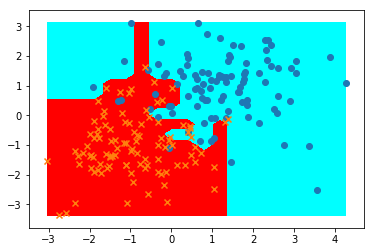

In [411]:
autre_set=ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),100)
print("Taille de la base générée :", autre_set.size(), "exemples")
adautre=ArbreDecision(0.0)          
adautre.train(autre_set)            
ut.plot_frontiere(autre_set,adautre,20)
ut.plot2DSet(autre_set) 

Modification de la fonction <code>construit_ad</code> afin d'utiliser le gain d'information comme critère d'arrêt. 

L'algorithme est modifié ainsi:

Pour construire un arbre de décision, il faut réaliser les étapes suivantes:
- si l'entropie de Shannon de l'ensemble courant est inférieure à epsilon (réel positif fixé et qui est un paramètre de l'algorithme), alors construire une feuille avec cet ensemble, la classe associée à cette feuille est la classe majoritaire;
- sinon, pour chaque attribut, calculer le seuil de discrétisation et l'entropie de Shannon correspondante
    - choisir l'attribut qui donne une valeur d'entropie minimale
    - regarder le gain d'information apporté par le test sur les valeurs de cet attribut
        - si ce gain est inférieur à epsilon alors construire une feuille avec l'ensemble
        - sinon l'attribut choisi sert à constituer un noeud de l'arbre de décision, les arcs issus de ce noeud sont labeller par un test (inférieur ou égal ou supérieur) par rapport au seuil trouvé
    
On rappelle (cf. cours) que le gain d'information vaut:

$$I-s(A_j,Y) = D(Y) - Q_Y(A_j)$$

avec $D(Y)$, l'entropie de Shannon de l'ensemble courant, et $Q_Y(A_j)$ l'entropie de de la classe pour la coupure par le seuil trouvé sur l'attribut $A_j$).



In [385]:
def construit_AD(LSet,epsilon):
    """ LSet : LabeledSet
        epsilon : seuil d'entropie pour le critère d'arrêt 
    """
    
    # Si la condition sur l'entropie est déjà respectée. 
    # Alors nous arrivons au bout de l'arbre. On rend donc une feuille
    if(entropie(LSet) <= epsilon):
        un_arbre = ArbreBinaire()
        classe = classe_majoritaire(LSet)
        un_arbre.ajoute_feuille(classe)
        un_arbre.est_feuille()
        return un_arbre
    
    
    
    parameter = None # Condition sur le parametre X
    entropMin = 2    # Permet de comparer les entropies
    dim = None       # Dimension du parametre X
    
    
    input_dim = LSet.getInputDimension()
    size = LSet.size()
    
    # Récuperation de (parameter,dim)
    for i in range(input_dim):
        entropI = discretise(LSet,i)
        #print("Entropie i ",entropI[1])
        if ( entropMin > entropI[1] ):
            #print("Evaluation : ", i , " // " ,entropI)
            entropMin = entropI[1]
            parameter = entropI[0]
            dim = i
    
    
    #Division des LabeledSet associés aux feuilles
    lsTab = divise(LSet,dim,parameter)
    ls1 = lsTab[0]
    ls2 = lsTab[1]
    
    

    
    
    # Appel récursif pour construire les feuilles.
    un_arbre0 = construit_AD(ls1,epsilon) 
    un_arbre1 = construit_AD(ls2,epsilon)
    
    un_arbre2 = ArbreBinaire()
    un_arbre2.ajoute_fils(un_arbre0,un_arbre1,dim,parameter)
    
            
    return un_arbre2

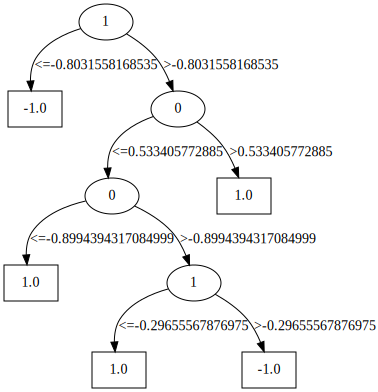

In [324]:
#test de l'affichage 
abin = construit_AD(set_exemples,0.1)
gtree = gv.Digraph(format='png')
abin.to_graph(gtree)

## Etape 2: Bagging d'arbres de décision

### Tirage aléatoire d'exemples

Le bootstrap s'effectue en tirant aléatoirement un échantillon de $m$ exemples à partir de la base d'apprentissage $X$. Cet échantillon sert ensuite à construire un classifieur.

Dans l'algorithme du bagging, ce processus est répété $B$ fois.

Afin de ne pas alourdir la place mémoire nécessaire pour réaliser un tel tirage, on ne travaille que sur les indices des exemples dans la base. Un **échantillon de $X$ est donc un vecteur d'entiers** qui représentent les indices des exemples choisis.


#### Tirages aléatoires en Python

In [9]:
import random
L= [i for i in range(0,11)]             # construction de la liste des entiers de 0 à 10
print("La liste L de départ: ",L)
EchL = random.sample(L,6)               # tirage de 6 éléments de L
print("Echantillon: ",EchL)

La liste L de départ:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Echantillon:  [8, 7, 1, 2, 10, 0]


La fonction <code>choice()</code> permet de choisir aléatoirement un élément:

In [10]:
L= [i for i in range(0,11)]             # construction de la liste des entiers de 0 à 10
print("La liste L de départ: ",L)
elt = random.choice(L)                  # choix d'un élémént
print("Element choisi: ",elt)

La liste L de départ:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Element choisi:  0


Fonction <code>tirage()</code> qui étant donné un vecteur d'entiers $VX$ qui représente l'ensemble des indices des exemples d'une base d'apprentissage $X$, un entier $m$, et un booléen $r$, rend un vecteur de $m$ indices choisis aléatoirement dans $VX$. Si le booléen $r$ est vrai, le tirage s'effectue *avec remise*, sinon il s'effectue *sans remise*.

In [11]:
def tirage(VX, m, r):
    if(r):
        tirage = []
        for i in range (m):
            choix = random.choice(VX)
            #print(choix)
            tirage.append(random.choice(VX))
    else:
        tirage = random.sample(VX,m)
    return tirage

Exemples :

In [12]:
L= [i for i in range(0,10)]    # construction de la liste des entiers de 0 à 100
tirage(L,8,True)               # tirage avec remise

[2, 0, 3, 9, 6, 1, 6, 7]

In [13]:
tirage(L,8,False)               # tirage sans remise

[1, 5, 4, 9, 8, 7, 2, 0]

Fonction <code>echantillonLS()</code> qui, étant donné un <code>LabeledSet</code> $X$, un nombre entier $m$, et un booléen rend un échantillon de $X$ de taille $m$ sous la forme d'un <code>LabeledSet</code>. L'échantillon est obtenu par un tirage avec remise si le booléen est True, sinon, il est obtenu sans remise.

In [14]:
def echantillonLS(LSet,m,r):
    input_dimension = LSet.getInputDimension()
    size = LSet.size()
    LSetRetour = ls.LabeledSet(input_dimension)
    
    ListeIndices = [i for i in range(0,size)]
    
    if(r):
        for i in range(m):
            choix = random.choice(ListeIndices)
            X = LSet.getX(choix)
            Y = LSet.getY(choix)
            LSetRetour.addExample(X,Y)
    else:
        ListeChoix = random.sample(ListeIndices,m)
        for i in ListeChoix:
            X = LSet.getX(i)
            Y = LSet.getY(i)
            LSetRetour.addExample(X,Y)
    
    return LSetRetour

In [15]:
setTest = ls.LabeledSet(2)
setTest.addExample([0.0470799329584,-1.97596265858],-1)
setTest.addExample([-0.673998013071,0.0693931940855],-1)
setTest.addExample([-0.84587451642,0.761766191612],-1)
setTest.addExample([-1.39596839858,-0.943807082082],-1)
setTest.addExample([0.319301767707,0.566169775123],-1)

In [16]:
print("La base")
setTest.affiche_base()
print("\nTirage sans remise")
setT = echantillonLS(setTest,3,False)
setT.affiche_base()
print("\nTirage avec remise")
setT = echantillonLS(setTest,3,True)
setT.affiche_base()

La base
Exemple 0
	description :  [ 0.04707993 -1.97596266]
	label :  [-1]
Exemple 1
	description :  [-0.67399801  0.06939319]
	label :  [-1]
Exemple 2
	description :  [-0.84587452  0.76176619]
	label :  [-1]
Exemple 3
	description :  [-1.3959684  -0.94380708]
	label :  [-1]
Exemple 4
	description :  [0.31930177 0.56616978]
	label :  [-1]

Tirage sans remise
Exemple 0
	description :  [-1.3959684  -0.94380708]
	label :  [-1]
Exemple 1
	description :  [ 0.04707993 -1.97596266]
	label :  [-1]
Exemple 2
	description :  [-0.84587452  0.76176619]
	label :  [-1]

Tirage avec remise
Exemple 0
	description :  [ 0.04707993 -1.97596266]
	label :  [-1]
Exemple 1
	description :  [-0.84587452  0.76176619]
	label :  [-1]
Exemple 2
	description :  [-0.67399801  0.06939319]
	label :  [-1]


<code>ClassifierBaggingTree</code>, dérivée de la classe <code>Classifier</code>, qui permet d'implémenter un bagging d'arbres de décision. Les spécifications de cette classe sont :
- la création de l'ensemble nécessite les paramètres suivants : 
    - le nombre $B$ d'arbres à construire, 
    - le pourcentage d'exemples de la base d'apprentissage utilisés pour constituer un échantillon, 
    - un booléen qui précise si un échantillon est tiré avec ou sans remise
    - et la valeur de seuil d'entropie pour arrêter la construction de chaque arbre, 
- l'apprentissage (méthode <code>train()</code>) construit autant d'arbres que précisé à la création. Chaque arbre est construit à partir d'un échantillon de la base d'apprentissage (<code>LabeledSet</code>) donnée en argument. Les arbres construits sont stockés dans un ensemble Python.

- la prédiction (méthode <code>predict()</code>) classe un exemple par vote de tous les arbres de la forêt. Si la somme des votes est positive ou nulle, la classe rendue est +1, sinon, la classe rendue est -1.

In [203]:
class ClassifierBaggingTree(cl.Classifier):
    def __init__(self,nombre_arbre,pourcentage,seuilEntropie,remise):
        self.nombre_arbre = nombre_arbre
        self.pourcentage = pourcentage
        self.remise = remise
        self.seuilEntropie = seuilEntropie
        
    def train(self,LSet):
        LSetsize = LSet.size()
        nb_exemples = math.ceil(LSetsize * self.pourcentage)
        self.setLSet = []
        self.setArbre = []
        cpt = 0
        
        LSet = ut.shuffle_ls(LSet)
        
        
        
        for i in range(self.nombre_arbre):
            LSetChoisit = echantillonLS(LSet,nb_exemples,self.remise)
            arbre = ArbreDecision(self.seuilEntropie)
            arbre.train(LSetChoisit)
            self.setArbre.append(arbre)

        
    def predict(self,x):
        res = 0
        for i in range (len(self.setArbre)):
            res += self.setArbre[i].predict(x)
            #print(res)
        if(res >= 0):
            return 1
        else:
            return -1

exemple: 0  vraie classe =  [1] - classe trouvee =  1
exemple: 1  vraie classe =  [1] - classe trouvee =  1
exemple: 2  vraie classe =  [1] - classe trouvee =  1
exemple: 3  vraie classe =  [1] - classe trouvee =  1
exemple: 4  vraie classe =  [1] - classe trouvee =  1
exemple: 5  vraie classe =  [1] - classe trouvee =  1
exemple: 6  vraie classe =  [1] - classe trouvee =  -1
exemple: 7  vraie classe =  [1] - classe trouvee =  1
exemple: 8  vraie classe =  [1] - classe trouvee =  1
exemple: 9  vraie classe =  [1] - classe trouvee =  1
exemple: 10  vraie classe =  [-1] - classe trouvee =  -1
exemple: 11  vraie classe =  [-1] - classe trouvee =  -1
exemple: 12  vraie classe =  [-1] - classe trouvee =  -1
exemple: 13  vraie classe =  [-1] - classe trouvee =  -1
exemple: 14  vraie classe =  [-1] - classe trouvee =  -1
exemple: 15  vraie classe =  [-1] - classe trouvee =  1
exemple: 16  vraie classe =  [-1] - classe trouvee =  -1
exemple: 17  vraie classe =  [-1] - classe trouvee =  -1
exem

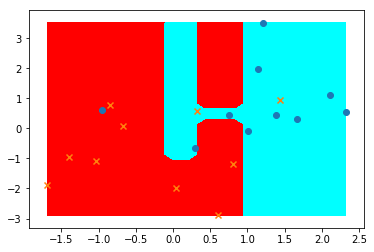

In [424]:
foret = ClassifierBaggingTree(10,0.3,0.0,True)
foret.train(set_exemples)
for i in range(set_exemples.size()):
    print("exemple:",i," vraie classe = ", set_exemples.getY(i), "- classe trouvee = ", foret.predict(set_exemples.getX(i)))
    
ut.plot_frontiere(set_exemples,foret,20)
ut.plot2DSet(set_exemples) 

print("\naccuracy totale:",foret.accuracy(set_exemples))

### Expérimentations

- générer une base d'apprentissage $X$ contenant au moins 1000 exemples ;
- réaliser un échantillon de cette base contenant 50 exemples de chaque classe. Soit $E$ cet échantillon, et soit $F$ l'ensemble des exemples de $X$ qui ne sont pas dans $E$ ;
- réaliser un apprentissage par bagging sur $F$ et évaluer le taux de prédiction du modèle obtenu sur $E$ ;
- construire la courbe donnant le taux de prédiction obtenu en augmentant la taille de la forêt d'arbres de 1 à 20 arbres. 

Taille de la base générée : 2000 exemples


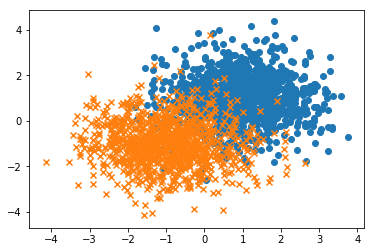

In [212]:
DataSet=ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),1000)
DataSet = ut.shuffle_ls(DataSet)
print("Taille de la base générée :", DataSet.size(), "exemples")
ut.plot2DSet(DataSet) 

In [213]:
TrainSet, TestSet = ut.split_set(DataSet,0.05)

Taille de la base générée TRAIN : 100 exemples


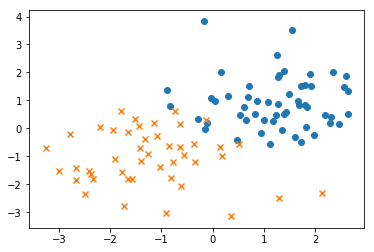

In [214]:
print("Taille de la base générée TRAIN :", TrainSet.size(), "exemples")
ut.plot2DSet(TrainSet) 

Taille de la base générée TEST : 1900 exemples


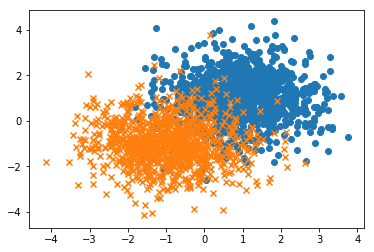

In [215]:
print("Taille de la base générée TEST :", TestSet.size(), "exemples")
ut.plot2DSet(TestSet) 

In [216]:
# Réaliser un apprentissage par bagging sur E et évaluer le taux de prédiction du modèle sur F
foret20 =  ClassifierBaggingTree(20,0.3,0.0,True)
foret20.train(TrainSet)
print("Bagging : 20 trees: accuracy totale: train=%.4f test=%.4f"%(foret20.accuracy(TrainSet),foret20.accuracy(TestSet)))

Bagging : 20 trees: accuracy totale: train=97.0000 test=89.6316


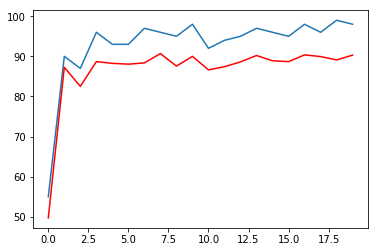

In [220]:
accuracyTrain = []
accuracyTest = []
for i in range(0,20):
    foretI =  ClassifierBaggingTree(i,0.3,0.0,True)
    foretI.train(TrainSet)
    accuracyTrain.append(foretI.accuracy(TrainSet))
    accuracyTest.append(foretI.accuracy(TestSet))

#Blue = Training accuracy
#Red = Testing accuracy
plt.plot(accuracyTrain)
plt.plot(accuracyTest,'r')
plt.show()


### Evaluation par la méthode "Out Of Bags"

La classe <code>ClassifierBaggingTreeOOB</code> qui étend la classe d'un classifieur bagging pour prendre en compte la spécificité de l'approche OOB.

Le calcul du taux de bonne classification s'effectuera comme suit:
- soit $t_i$ le taux de bonne classification de $A_i$ pour l'ensemble OOB $\mathcal{T}_i$
- le taux de global de bonne classification de la forêt d'arbres $A_1$,..., $A_B$ est donné par $\frac{1}{B}\sum_{i=1}^{B} t_i$


In [434]:
def echantillonLS2(LSet,m,r):
    input_dimension = LSet.getInputDimension()
    size = LSet.size()
    LSetRetour = ls.LabeledSet(input_dimension)
    LSetExemple = ls.LabeledSet(input_dimension)
    
    ListeIndices = [i for i in range(0,size)]
    ListeChoix = []
    if(r):
        for i in range(m):
            choix = random.choice(ListeIndices)
            ListeChoix.append(choix)
            X = LSet.getX(choix)
            Y = LSet.getY(choix)
            LSetRetour.addExample(X,Y)
    else:
        ListeChoix = random.sample(ListeIndices,m)
        for i in ListeChoix:
            X = LSet.getX(i)
            Y = LSet.getY(i)
            LSetRetour.addExample(X,Y)
    
    for i in range (size):
        if i not in ListeChoix:
            LSetExemple.addExample(LSet.getX(i),LSet.getY(i))
            LSetExemple.addExample(LSet.getX(i),LSet.getY(i))
    
    return LSetRetour,LSetExemple

In [435]:
class ClassifierBaggingTreeOOB(ClassifierBaggingTree):
    def __init__(self,nombre_arbre,pourcentage,seuilEntropie,remise):
        self.nombre_arbre = nombre_arbre
        self.pourcentage = pourcentage
        self.remise = remise
        self.seuilEntropie = seuilEntropie
        
    def train(self,LSet):
        LSetsize = LSet.size()
        nb_exemples = math.ceil(LSetsize * self.pourcentage)
        self.setLSetTrain = []
        self.setLSetTest = []
        self.setArbre = []
        
        cpt = 0
        
        LSet = ut.shuffle_ls(LSet)
        
        
        for i in range(self.nombre_arbre):
            
            lstn,lstt = echantillonLS2(LSet,nb_exemples,self.remise)
            
            
            self.setLSetTrain.append(lstn)
            self.setLSetTest.append(lstt)
            
            arbre = ArbreDecision(self.seuilEntropie)
            arbre.train(lstn)
            self.setArbre.append(arbre)

        
    def predict(self,x):
        res = 0
        for i in range (len(self.setArbre)):
            res += self.setArbre[i].predict(x)
            #print(res)
        if(res >= 0):
            return 1
        else:
            return -1
        
    def OOB(self):
        if(self.nombre_arbre == 0):
            return 0
        acc = 0
        for i in range (self.nombre_arbre):
            acc += self.setArbre[i].accuracy(self.setLSetTest[i])
        return acc/self.nombre_arbre

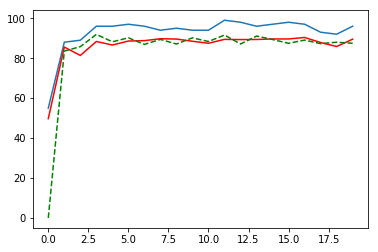

In [436]:
accuracyTrain = []
accuracyTest = []
accuracyOOB = []
for i in range(20):
    foretI =  ClassifierBaggingTreeOOB(i,0.3,0.0,True)
    foretI.train(TrainSet)
    accuracyTrain.append(foretI.accuracy(TrainSet))
    accuracyTest.append(foretI.accuracy(TestSet))
    accuracyOOB.append(foretI.OOB())

#Blue = Training accuracy
#Red = Testing accuracy
#Green = OOB
plt.plot(accuracyTrain)
plt.plot(accuracyTest,'r')
plt.plot(accuracyOOB,'--g')
plt.show()


## Etape 3: Random forests

La classe <code>ClassifierRandomForest</code> implémente l'algorithme des random forests.

In [437]:
def construit_AD_aleatoire(LSet,epsilon,nbatt):
    """ LSet : LabeledSet
        epsilon : seuil d'entropie pour le critère d'arrêt 
    """
    
    
    # Si la condition sur l'entropie est déjà respectée. 
    # Alors nous arrivons au bout de l'arbre. On rend donc une feuille
    if(entropie(LSet) <= epsilon):
        un_arbre = ArbreBinaire()
        classe = classe_majoritaire(LSet)
        un_arbre.ajoute_feuille(classe)
        un_arbre.est_feuille()
        return un_arbre
    
    parameter = None # Condition sur le parametre X
    entropMin = 2    # Permet de comparer les entropies
    dim = None       # Dimension du parametre X
    listeAttribut = [i for i in range(0,nbatt)] 
    
    input_dim = LSet.getInputDimension()
    size = LSet.size()
    
    dim = random.choice(listeAttribut)
    parameter = discretise(LSet,dim)[0]
    
    #Division des LabeledSet associés aux feuilles
    lsTab = divise(LSet,dim,parameter)
    ls1 = lsTab[0]
    ls2 = lsTab[1]
    
    Gain_Information = entropie(LSet) - ((entropie(ls1) + entropie(ls2))/2)
    
    if(Gain_Information <= epsilon):
        un_arbre = ArbreBinaire()
        classe = classe_majoritaire(LSet)
        un_arbre.ajoute_feuille(classe)
        un_arbre.est_feuille()
        return un_arbre
    
    # Appel récursif pour construire les feuilles.
    un_arbre0 = construit_AD_aleatoire(ls1,epsilon,nbatt) 
    un_arbre1 = construit_AD_aleatoire(ls2,epsilon,nbatt)
    
    un_arbre2 = ArbreBinaire()
    un_arbre2.ajoute_fils(un_arbre0,un_arbre1,dim,parameter)
    
    return un_arbre2


    

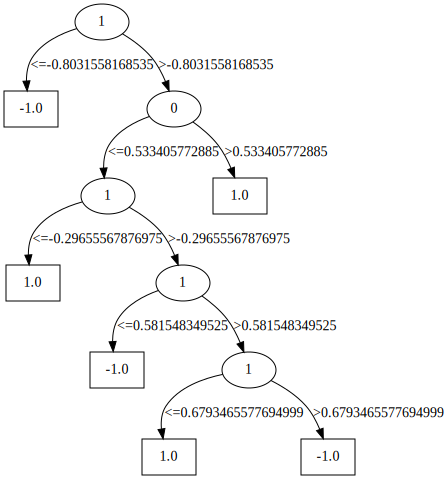

In [438]:
#test de l'affichage 
abin = construit_AD_aleatoire(set_exemples,0.1,2)
gtree = gv.Digraph(format='png')
abin.to_graph(gtree)

In [440]:
class ArbreDecisionAleatoire(ArbreDecision):
    def train(self,set):
        # construction de l'arbre de décision 
        self.set=set
        self.racine = construit_AD_aleatoire(set,self.epsilon,set.getInputDimension())

In [441]:
class ClassifierRandomForest(ClassifierBaggingTree):
    def __init__(self,nombre_arbre,pourcentage,seuilEntropie,remise):
        self.nombre_arbre = nombre_arbre
        self.pourcentage = pourcentage
        self.remise = remise
        self.seuilEntropie = seuilEntropie
        
    def train(self,LSet):
        LSetsize = LSet.size()
        nb_exemples = math.ceil(LSetsize * self.pourcentage)
        self.setLSetTrain = []
        self.setLSetTest = []
        self.setArbre = []
        
        cpt = 0
        
        LSet = ut.shuffle_ls(LSet)
        
        
        for i in range(self.nombre_arbre):
            
            lstn,lstt = echantillonLS2(LSet,nb_exemples,self.remise)
            
            
            self.setLSetTrain.append(lstn)
            self.setLSetTest.append(lstt)
            
            arbre = ArbreDecisionAleatoire(self.seuilEntropie)
            arbre.train(lstn)
            self.setArbre.append(arbre)

        
    def predict(self,x):
        res = 0
        for i in range (len(self.setArbre)):
            res += self.setArbre[i].predict(x)
            #print(res)
        if(res >= 0):
            return 1
        else:
            return -1
        
    def OOB(self):
        if(self.nombre_arbre == 0):
            return 0
        acc = 0
        for i in range (self.nombre_arbre):
            acc += self.setArbre[i].accuracy(self.setLSetTest[i])
        return acc/self.nombre_arbre

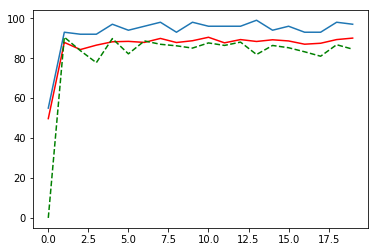

In [442]:
accuracyTrain = []
accuracyTest = []
accuracyOOB = []
for i in range(20):
    foretI =  ClassifierRandomForest(i,0.3,0.0,True)
    foretI.train(TrainSet)
    accuracyTrain.append(foretI.accuracy(TrainSet))
    accuracyTest.append(foretI.accuracy(TestSet))
    accuracyOOB.append(foretI.OOB())

#Blue = Training accuracy
#Red = Testing accuracy
#Green = OOB
plt.plot(accuracyTrain)
plt.plot(accuracyTest,'r')
plt.plot(accuracyOOB,'--g')
plt.show()


## Etape 4: expérimentation

Comparaison entre le bagging d'arbres et les random forests sur d'autres bases d'apprentissage (réelles ou générées aléatoirement). 

In [486]:
autre_set = ut.createXOR(200,0.01)


LS = ls.LabeledSet(2)
number_of_points = 100
    
centered_gaussian1 = np.random.multivariate_normal(np.array([-0.3,1.2]),0.1*np.array([[1,0],[0,1]]),number_of_points)
centered_gaussian2 = np.random.multivariate_normal(np.array([0.5,0.5]),0.1*np.array([[1,0],[0,1]]),number_of_points)
for i in range (number_of_points):
    LS.addExample(centered_gaussian1[i],1)
    LS.addExample(centered_gaussian2[i],1)


120


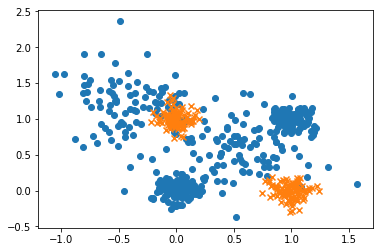

In [487]:
set00 = ut.concatenate(autre_set,LS)
set00 = ut.shuffle_ls(set00)
TrainSet,TestSet = ut.split_set(set00,0.2)

print(TrainSet.size())
ut.plot2DSet(set00)

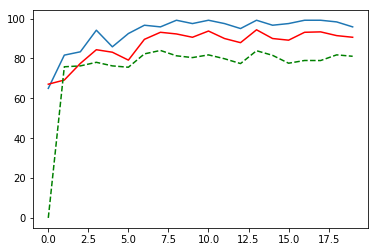

In [488]:
accuracyTrain = []
accuracyTest = []
accuracyOOB = []
for i in range(20):
    foretI =  ClassifierBaggingTreeOOB(i,0.3,0.0,True)
    foretI.train(TrainSet)
    accuracyTrain.append(foretI.accuracy(TrainSet))
    accuracyTest.append(foretI.accuracy(TestSet))
    accuracyOOB.append(foretI.OOB())


#Blue = Training accuracy
#Red = Testing accuracy
#Green = OOB
plt.plot(accuracyTrain)
plt.plot(accuracyTest,'r')
plt.plot(accuracyOOB,'--g')
plt.show()


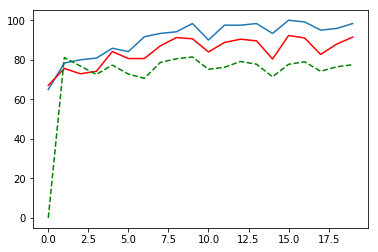

In [489]:
accuracyTrain = []
accuracyTest = []
accuracyOOB = []
for i in range(20):
    foretI =  ClassifierRandomForest(i,0.3,0.0,True)
    foretI.train(TrainSet)
    accuracyTrain.append(foretI.accuracy(TrainSet))
    accuracyTest.append(foretI.accuracy(TestSet))
    accuracyOOB.append(foretI.OOB())

#Blue = Training accuracy
#Red = Testing accuracy
#Green = OOB
plt.plot(accuracyTrain)
plt.plot(accuracyTest,'r')
plt.plot(accuracyOOB,'--g')
plt.show()
